<a href="https://colab.research.google.com/github/j23-cs167/project-2-nickwharff/blob/main/Project2_wharff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Nick Wharff

Proposed Points (out of 25):

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

I downloaded a mushroom dataset from kaggle: [link here](https://www.kaggle.com/datasets/uciml/mushroom-classification). I will be testing tdifferent models on this dataset in order to determine if you can accurately predict whether or not a mushroom is poisionous from its physical traits. I will be using an accuracy metric to determine how well my models are doing.

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

- started by checking if there was any missing data, of which there is none.
- then split data into test/train
- didn't normalize as all data values are strings
- however, did create dummy variables for all columns except target

In [20]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# load and prepare your data here
path = '/content/drive/MyDrive/CS167/datasets/mushrooms.csv'

shroom = pd.read_csv(path)
shroom.columns

shroom.isna().any() # No missing data

shroom.shape


(8124, 23)

In [23]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder

import numpy

target = 'class'
predictors = shroom.columns.drop(target)

# predictors

shroom_dum = pd.get_dummies(shroom, columns = predictors)

shroom_dum.head()


,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,e,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

target = 'class'
predictors = shroom_dum.columns.drop(target)

train_data, test_data, train_sln, test_sln = \
        train_test_split(shroom_dum[predictors], shroom_dum[target], test_size = 0.2, random_state=41)

train_data.shape

train_data.head()


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
3144,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
5539,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4374,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3806,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
8101,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [25]:
# Baseline

from sklearn.dummy import DummyClassifier
from sklearn import metrics


dummy = DummyClassifier()
dummy.fit(train_data, train_sln)

pre = dummy.predict(test_data)

print('Accuracy for dummy : ', metrics.accuracy_score(test_sln, pre))

Accuracy for dummy :  0.52


# 3. Research

Put your code and your experiments here.

In [26]:
# KNN

from sklearn import neighbors

knn_accuracy = []

for i in range(1,6499,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_data,train_sln)
    predictions = knn.predict(test_data)
    current_acc = metrics.accuracy_score(predictions, test_sln)
    knn_accuracy.append(current_acc)





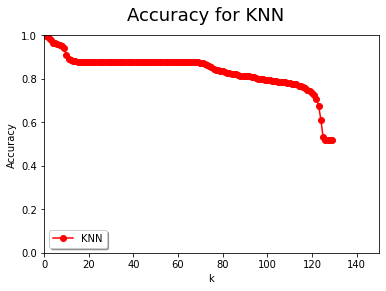

In [31]:
import matplotlib.pyplot as plt

xvals = range(1,6499,50)
plt.suptitle('Accuracy for KNN',fontsize=18)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(knn_accuracy,'ro-',label='KNN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,150,0,1])


plt.show()

# best with 3 NN

In [37]:
# WKNN
wknn_accuracy = []

for i in range(1,6499,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    knn.fit(train_data,train_sln)
    predictions2 = knn.predict(test_data)
    current_acc = metrics.accuracy_score(predictions2, test_sln)
    wknn_accuracy.append(current_acc)

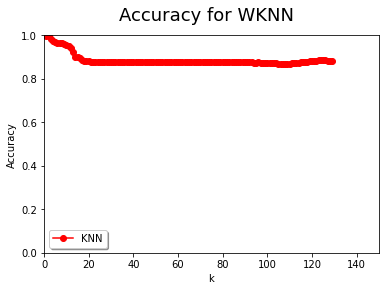

In [38]:
# xvals = range(1,6499,50)
plt.suptitle('Accuracy for WKNN',fontsize=18)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(wknn_accuracy,'ro-',label='KNN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,150,0,1])


plt.show()

# accurate at 2

In [44]:
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay

svc = svm.SVC
svc.fit(train_data, train_sln)
sv_pre = svc.predict(test_data)

accuracy = metrics.accuracy_score(sv_pre,test_sln)

print('Accuracy:', accuracy)

# Confusion Matrix
vals = shroom[target].unique() ## possible classification values (species)
conf_mat = metrics.confusion_matrix(test_sln, sv_pre, labels=vals)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=vals)
disp.plot()
plt.show()

TypeError: ignored

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

In [36]:
# optimal KNN 

opt_knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
opt_knn.fit(train_data,train_sln)
predictions = opt_knn.predict(test_data)
print('Accuracy for this model was: ', metrics.accuracy_score(predictions,test_sln))

Accuracy for this model was:  1.0


In [40]:
# optimal WKNN

opt_wknn = neighbors.KNeighborsClassifier(n_neighbors = 3)
opt_wknn.fit(train_data, train_sln)
wknn_pre = opt_wknn.predict(test_data)

print('Accuracy for this model was: ', metrics.accuracy_score(wknn_pre, test_sln))

Accuracy for this model was:  1.0


*your answer here*

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

*your answer here*